In [1]:
# Importing libararies for neural network

import tensorflow as tf
from tensorflow import keras

# Importing libararies for data manipulation

import pandas as pd
import numpy as np

# Importing libraries for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Customer Churn -> Many businesses faces this issue an dwish to know why their customers are leaving them ???

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4882,8404-VIOMB,Female,0,No,No,66,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),62.50,4136.4,No
4646,5032-MIYKT,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.70,70.7,No
1890,6770-XUAGN,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.00,21,Yes
743,4018-PPNDW,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.10,1551.6,No
1326,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [5]:
data.drop('customerID', axis=1, inplace=True)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [9]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [10]:
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [11]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [12]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [14]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
data.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [17]:
# data['TotalCharges'] = float(data['TotalCharges'])
pd.to_numeric(data.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [18]:
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
data[~pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [20]:
data.shape

(7043, 20)

In [21]:
data = data[~pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]
data.shape

(7032, 20)

In [26]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8864\2235852524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [28]:
data.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [32]:
data[data.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

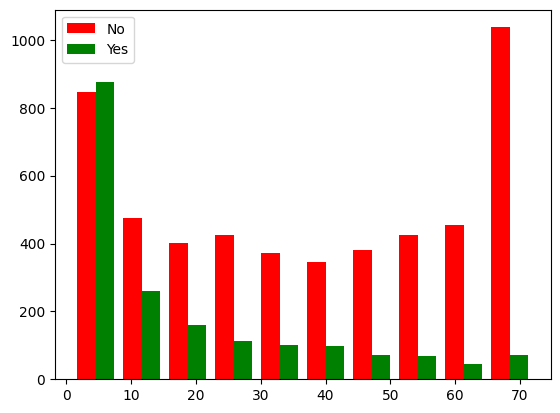

In [36]:
data_churn_no = data[data.Churn=='No'].tenure
data_churn_yes = data[data.Churn=='Yes'].tenure

plt.hist([data_churn_no, data_churn_yes], color=['red', 'green'], label= ['No', 'Yes'])
plt.legend()

In [42]:
for column in data:
    if data[column].dtype == 'object':
        print(f"{column} :             {data[column].unique()}")

gender :             ['Female' 'Male']
Partner :             ['Yes' 'No']
Dependents :             ['No' 'Yes']
PhoneService :             ['No' 'Yes']
MultipleLines :             ['No phone service' 'No' 'Yes']
InternetService :             ['DSL' 'Fiber optic' 'No']
OnlineSecurity :             ['No' 'Yes' 'No internet service']
OnlineBackup :             ['Yes' 'No' 'No internet service']
DeviceProtection :             ['No' 'Yes' 'No internet service']
TechSupport :             ['No' 'Yes' 'No internet service']
StreamingTV :             ['No' 'Yes' 'No internet service']
StreamingMovies :             ['No' 'Yes' 'No internet service']
Contract :             ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :             ['Yes' 'No']
PaymentMethod :             ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :             ['No' 'Yes']


In [43]:
data.replace('No internet service', 'No', inplace=True)

In [44]:
data.replace('No phone service', 'No', inplace=True)

In [45]:
for column in data:
    if data[column].dtype == 'object':
        print(f"{column} :             {data[column].unique()}")

gender :             ['Female' 'Male']
Partner :             ['Yes' 'No']
Dependents :             ['No' 'Yes']
PhoneService :             ['No' 'Yes']
MultipleLines :             ['No' 'Yes']
InternetService :             ['DSL' 'Fiber optic' 'No']
OnlineSecurity :             ['No' 'Yes']
OnlineBackup :             ['Yes' 'No']
DeviceProtection :             ['No' 'Yes']
TechSupport :             ['No' 'Yes']
StreamingTV :             ['No' 'Yes']
StreamingMovies :             ['No' 'Yes']
Contract :             ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :             ['Yes' 'No']
PaymentMethod :             ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :             ['No' 'Yes']


In [47]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [48]:
for columns in yes_no_columns:
    data[columns].replace({"Yes":1, "No":0}, inplace=True)

In [49]:
for column in data:
    if data[column].dtype == 'object':
        print(f"{column} :             {data[column].unique()}")

gender :             ['Female' 'Male']
InternetService :             ['DSL' 'Fiber optic' 'No']
Contract :             ['Month-to-month' 'One year' 'Two year']
PaymentMethod :             ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [50]:
for column in data:
    print(f"{column} :             {data[column].unique()}")

gender :             ['Female' 'Male']
SeniorCitizen :             [0 1]
Partner :             [1 0]
Dependents :             [0 1]
tenure :             [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :             [0 1]
MultipleLines :             [0 1]
InternetService :             ['DSL' 'Fiber optic' 'No']
OnlineSecurity :             [0 1]
OnlineBackup :             [1 0]
DeviceProtection :             [0 1]
TechSupport :             [0 1]
StreamingTV :             [0 1]
StreamingMovies :             [0 1]
Contract :             ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :             [1 0]
PaymentMethod :             ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :             [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCh

In [51]:
data['gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [52]:
for column in data:
    print(f"{column} :             {data[column].unique()}")

gender :             [1 0]
SeniorCitizen :             [0 1]
Partner :             [1 0]
Dependents :             [0 1]
tenure :             [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :             [0 1]
MultipleLines :             [0 1]
InternetService :             ['DSL' 'Fiber optic' 'No']
OnlineSecurity :             [0 1]
OnlineBackup :             [1 0]
DeviceProtection :             [0 1]
TechSupport :             [0 1]
StreamingTV :             [0 1]
StreamingMovies :             [0 1]
Contract :             ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :             [1 0]
PaymentMethod :             ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :             [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :     

In [55]:
pd.get_dummies(data=data, columns=['InternetService', 'Contract', 'PaymentMethod'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [56]:
data1 = pd.get_dummies(data=data, columns=['InternetService', 'Contract', 'PaymentMethod'])
data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [57]:
data.shape

(7032, 20)

In [58]:
data1.shape

(7032, 27)

In [66]:
for columns in data1.columns:
    data1[columns].replace({True:1, False:0}, inplace=True)

In [67]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [69]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
columns_to_scale

['tenure', 'MonthlyCharges', 'TotalCharges']

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [71]:
data1[columns_to_scale] = scaler.fit_transform(data1[columns_to_scale])

In [72]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [75]:
x = data1.drop('Churn', axis=1)
y = data1.Churn

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=5)

In [77]:
x_train.shape

(5625, 26)

In [78]:
x_test.shape

(1407, 26)

In [80]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',                    #output variable is 0 or 1.
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 1ms/step - loss: 0.4921 - accuracy: 0.7573
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8023
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8057
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8055
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8075
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8080
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8071
Epoch 8/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8110
Epoch 9/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8100
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8078

In [81]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.7854


[0.44169098138809204, 0.7853589057922363]

In [82]:
y_predicted = model.predict(x_test)
y_predicted

44/44 [==============================] - 0s 1ms/step


array([[0.20785856],
       [0.4282327 ],
       [0.00987803],
       ...,
       [0.7697901 ],
       [0.65450877],
       [0.62211055]], dtype=float32)

In [93]:
y_predict = []

for i in y_predicted:
    y_predict.append(0) if i < 0.5 else y_predict.append(1)

y_predict[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.53      0.59       408

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

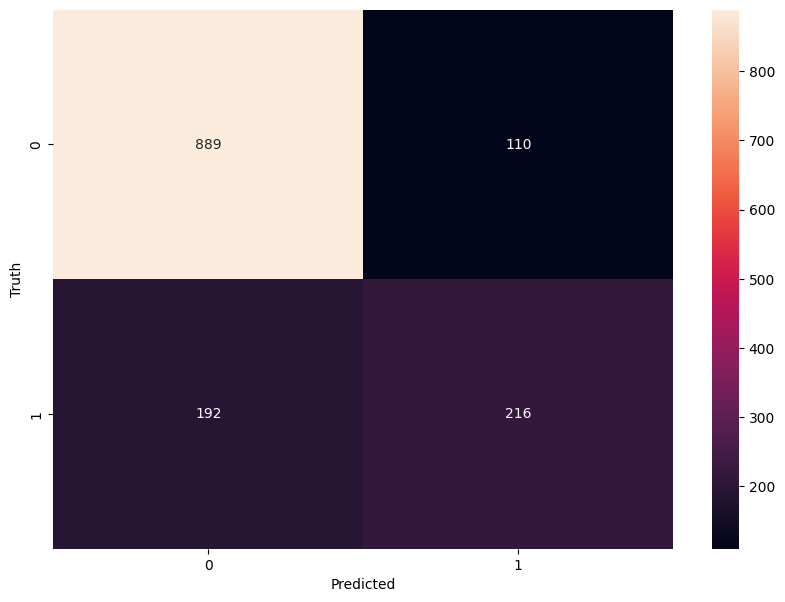

In [88]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [91]:
(889+216)/(889+216+110+192)         #accuracy

0.7853589196872779

In [94]:
(889)/(889+192)                     #precision

0.8223866790009251

In [96]:
889/(889+110)                       #recall

0.8898898898898899

In [97]:
(216)/(216+110)                        #precsion

0.6625766871165644

In [98]:
(216)/(216+192)                        #recall

0.5294117647058824